# Q2)
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [12]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# creating empty reviews list
galaxy_reviews=[]

# Extracting reviews from Amazon website
for i in range(1,20):
  gal=[]  

url = 'https://www.amazon.in/Samsung-Galaxy-Ultra-Phantom-Storage/product-reviews/B0BT9FDZ8N/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.findAll("span",attrs={"class","a-size-base review-text review-text-content"})
for i in range(len(reviews)):
    gal.append(reviews[i].text)  
    galaxy_reviews=galaxy_reviews+gal

# writng reviews in a text file 
with open("galaxy.txt","w",encoding='utf8') as output:
    output.write(str(galaxy_reviews))

In [14]:
galaxy_reviews

['\nSwitched from iPhone 12 pro max to S23 Ultra for some reason. S23 Ultra is superfast, stylish and has very big screen but feeling somewhat inconvenient who used to iPhone. No regret for buying.\n',
 '\nSwitched from iPhone 12 pro max to S23 Ultra for some reason. S23 Ultra is superfast, stylish and has very big screen but feeling somewhat inconvenient who used to iPhone. No regret for buying.\n',
 '\nSuperb performance, amazing camera..hope future updates can improve battery life\n',
 '\nSwitched from iPhone 12 pro max to S23 Ultra for some reason. S23 Ultra is superfast, stylish and has very big screen but feeling somewhat inconvenient who used to iPhone. No regret for buying.\n',
 '\nSuperb performance, amazing camera..hope future updates can improve battery life\n',
 '\nYou can buy it if you can afford it but be sure to protect it as it comes with hefty price. If you are coming from iPhone and want to copy all photos then do it at the time of setting up. I found the battery is r

In [15]:
 # Joinining all the reviews into single paragraph 
gal_rev_string = " ".join(galaxy_reviews)

In [16]:
# Removing unwanted symbols incase if exists
gal_rev_string = re.sub("[^A-Za-z" "]+"," ",gal_rev_string).lower()
gal_rev_string = re.sub("[0-9" "]+"," ",gal_rev_string)

In [17]:
# words that contained in galaxy s23 reviews
gal_reviews_words = gal_rev_string.split(" ")
print(gal_reviews_words)
# stop_words = stopwords.words('english')

['', 'switched', 'from', 'iphone', 'pro', 'max', 'to', 's', 'ultra', 'for', 'some', 'reason', 's', 'ultra', 'is', 'superfast', 'stylish', 'and', 'has', 'very', 'big', 'screen', 'but', 'feeling', 'somewhat', 'inconvenient', 'who', 'used', 'to', 'iphone', 'no', 'regret', 'for', 'buying', 'switched', 'from', 'iphone', 'pro', 'max', 'to', 's', 'ultra', 'for', 'some', 'reason', 's', 'ultra', 'is', 'superfast', 'stylish', 'and', 'has', 'very', 'big', 'screen', 'but', 'feeling', 'somewhat', 'inconvenient', 'who', 'used', 'to', 'iphone', 'no', 'regret', 'for', 'buying', 'superb', 'performance', 'amazing', 'camera', 'hope', 'future', 'updates', 'can', 'improve', 'battery', 'life', 'switched', 'from', 'iphone', 'pro', 'max', 'to', 's', 'ultra', 'for', 'some', 'reason', 's', 'ultra', 'is', 'superfast', 'stylish', 'and', 'has', 'very', 'big', 'screen', 'but', 'feeling', 'somewhat', 'inconvenient', 'who', 'used', 'to', 'iphone', 'no', 'regret', 'for', 'buying', 'superb', 'performance', 'amazing', '

In [18]:
import spacy
nlp=spacy.load('en_core_web_md')
one_block=galaxy_reviews[15]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

OSError: ignored

In [19]:
# Joinining all the reviews into single paragraph 
gal_rev_para = " ".join(gal_reviews_words)

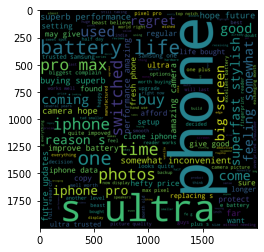

In [20]:
wordcloud_gal = WordCloud(
                      background_color='black',
    width=2000,height=2000
                     ).generate(gal_rev_para)

plt.imshow(wordcloud_gal)

In [27]:
# positive words # Choose the path for +ve words stored in system
with open("/content/positive-words.txt") as pos:
  poswords = pos.read().split("\n")

In [28]:
# Choosing the only words which are present in positive words
gal_pos = " ".join ([w for w in gal_reviews_words if w in poswords])

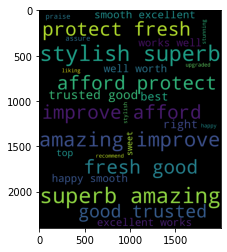

In [29]:
# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=2000,
                      height=2400
                     ).generate(gal_pos)

plt.imshow(wordcloud_pos)

In [39]:
# negative words  Choose path for -ve words stored in system
with open("/content/negative-words.txt",encoding = "ISO-8859-1") as neg:
  negwords = neg.read().split("\n")

In [40]:
# Choosing the only words which are present in negwords
gal_neg = " ".join ([w for w in gal_reviews_words if w in negwords])

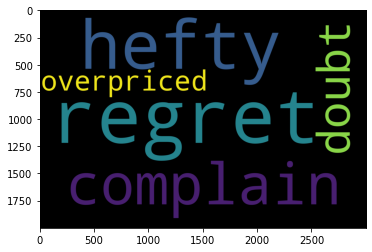

In [41]:
# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=3000,
                      height=2000
                     ).generate(gal_neg)

plt.imshow(wordcloud_neg)